In [39]:
import numpy as np
import scipy.linalg as la
import math
import matplotlib.pyplot as plt
import time
import random

In [50]:
def generate(d = 3, m = 1, L = 5):

    if d == 1:
        lambdas = [m]
    if d == 2:
        lambdas = [m, L]
    if d > 2:
        lambdas = np.random.uniform(low=m, high=L, size=(d-2,))
        lambdas = lambdas.tolist() + [m, L]

    A = np.diag(lambdas)
    q, _ = la.qr(np.random.rand(d, d))
    A = q.T @ A @ q

    return A

d = 100
m = 1
L = 1000

A = generate(d=d, m=m, L=L)
x0 = np.random.uniform(low=-L/10, high=L/10, size=(d,1))

In [51]:
def error(x):
    return np.linalg.norm(x, ord=2)**2

def f(x):
    return 0.5 * x.T @ A @ x

def grad(x):
    return A @ x

def gd(x0, gamma=1/L, iters=1000):
    
    errs = [error(x0)]
    times = [0.]
    start = time.time()
    x = x0

    for i in range(iters):
        x = x - gamma(i) * grad(x)
        errs.append(error(x))
        times.append(time.time() - start)
    
    return x, times, errs

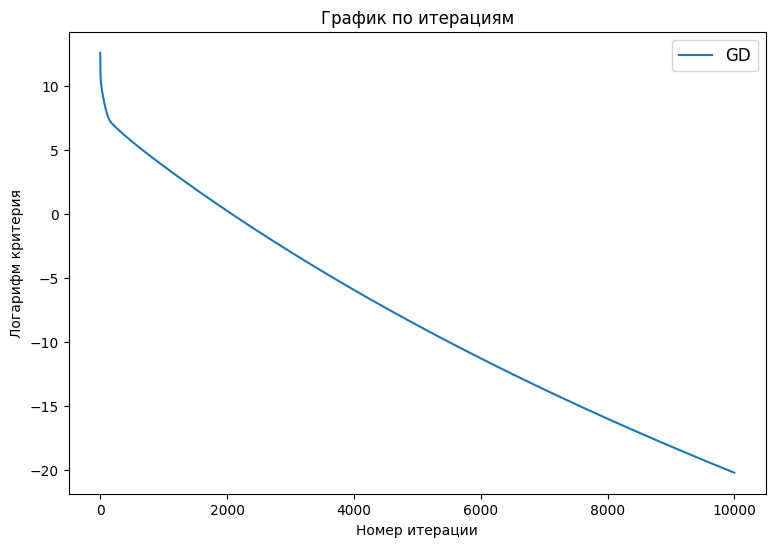

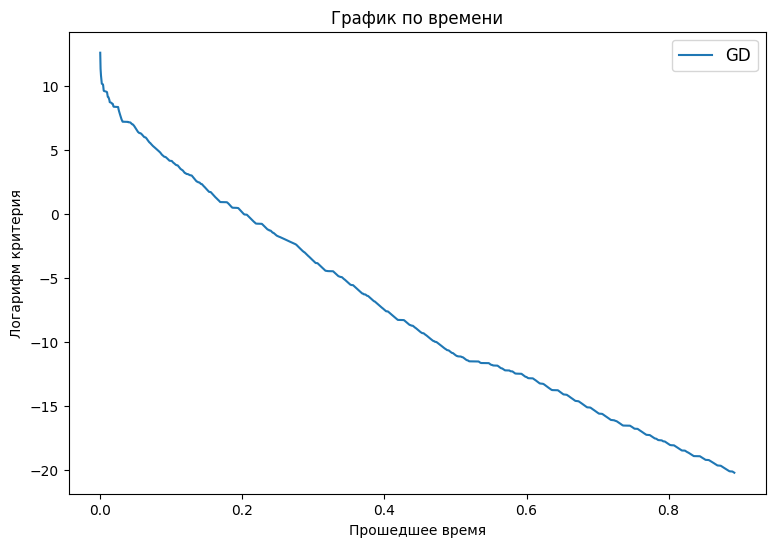

In [61]:
iters = 10000
x1, times1, errs1 = gd(x0, gamma=lambda i: 2/(L + 0.1*i), iters=iters)

plt.figure(figsize=(9, 6))
plt.plot(range(len(errs1)), np.log(errs1), label='GD')
plt.xlabel("Номер итерации")
plt.ylabel("Логарифм критерия")
plt.title('График по итерациям')
plt.legend(fontsize=12)
plt.show()

plt.figure(figsize=(9, 6))
plt.plot(times1, np.log(errs1), label="GD")
plt.xlabel("Прошедшее время")
plt.ylabel("Логарифм критерия")
plt.title('График по времени')
plt.legend(fontsize=12)
plt.show()